# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
pymaceuticals_complete = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
pymaceuticals_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
p_c = pymaceuticals_complete

In [4]:
# Checking the number of mice.
p_c["Mouse ID"].nunique()


249

In [5]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
p_c[p_c.duplicated(['Mouse ID','Timepoint'])]['Mouse ID'].unique()

array(['g989'], dtype=object)

In [6]:
# Optional: Get all the data for the duplicate mouse ID.
p_c[p_c['Mouse ID']=='g989']


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_p_c = p_c[p_c['Mouse ID'] != 'g989']
cleaned_p_c.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [8]:
# Checking the number of mice in the clean DataFrame.
cleaned_p_c["Mouse ID"].nunique()

248

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
summary_p_c = p_c.groupby("Drug Regimen")['Tumor Volume (mm3)']

pd.DataFrame({
    "Mean Tumor Volume": summary_p_c.mean(),
    "Median Tumor Volume": summary_p_c.median(),
    "Variance Tumor Volume": summary_p_c.var(),
    "Tumor Volume Std. Dev.": summary_p_c.std(),
    "Tumor Volume Std. Err.": summary_p_c.sem()
})

,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
summary_stats = summary_p_c.agg(["mean", "median", "var","std","sem"])
summary_stats
# Using the aggregation method, produce the same summary statistics in a single line


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

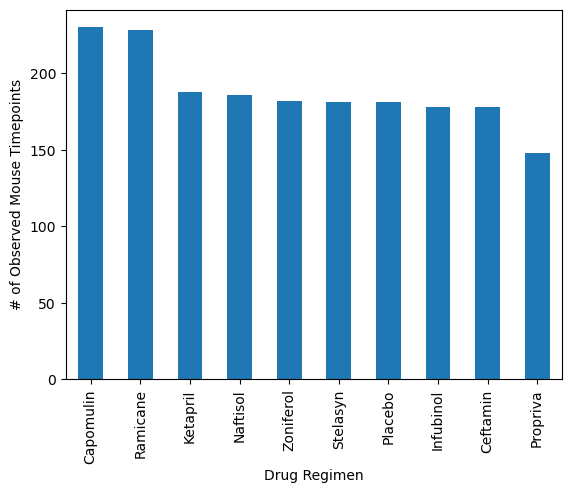

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_regimen_counts = cleaned_p_c["Drug Regimen"].value_counts()

drug_regimen_counts.plot(kind='bar', xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints')

plt.show()

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
data = cleaned_p_c.groupby('Drug Regimen').size().sort_values(ascending=False)
x = data.index
y = data.values

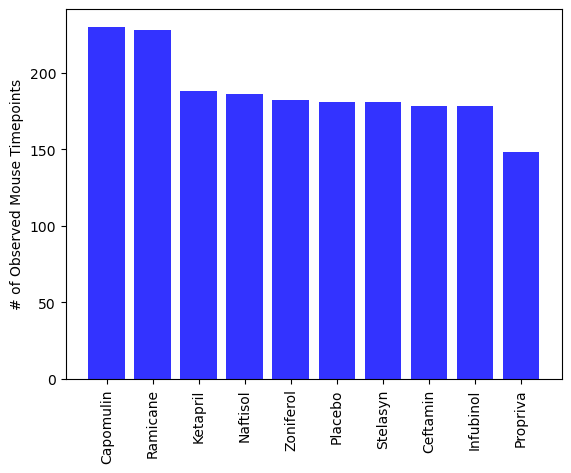

In [13]:
plt.bar(x, y, color="b", alpha=0.8, align='center')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=90)
plt.show()

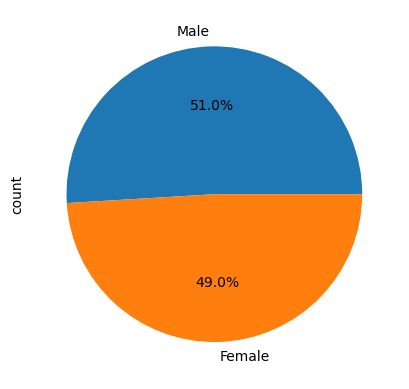

In [14]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
mouse_count = cleaned_p_c["Sex"].value_counts()

# Make the pie chart
mouse_count.plot(kind='pie', xlabel='Female', ylabel='count', autopct="%1.1f%%")
plt.show()

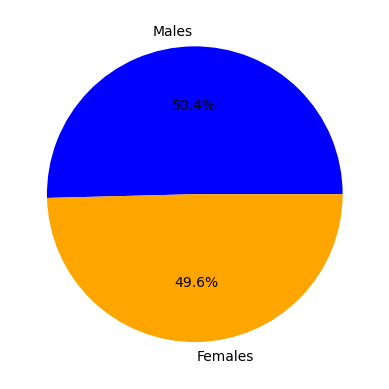

In [15]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
mouse_count = cleaned_p_c["Sex"].value_counts()

# Make the pie chart
labels = ["Males", "Females"]
sizes = [125, 123]
colors = ["blue", "orange"]
plt.pie(sizes, labels=labels, colors=colors,
       autopct="%1.1f%%", shadow=False)
plt.show()

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
max_tumor = cleaned_p_c.groupby('Mouse ID')['Timepoint'].max().reset_index()



merged_data = max_tumor.merge(cleaned_p_c, on=['Mouse ID', 'Timepoint'])
# Start by getting the last (greatest) timepoint for each mouse
merged_data
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [17]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []

for treatment in treatments:
    final_tumor_vol = merged_data.loc[merged_data["Drug Regimen"] == treatment]["Tumor Volume (mm3)"]
    
    tumor_volume_data.append(final_tumor_vol)
    
    quartiles = final_tumor_vol.quantile([0.25, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    
    print(f"{treatment}'s potential outliers: {outliers}")

# Calculate the IQR and quantitatively determine if there are any potential outliers.


       
    # Locate the rows which contain mice on each drug and get the tumor volumes
   

    # add subset
   

    # Determine outliers using upper and lower bounds


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


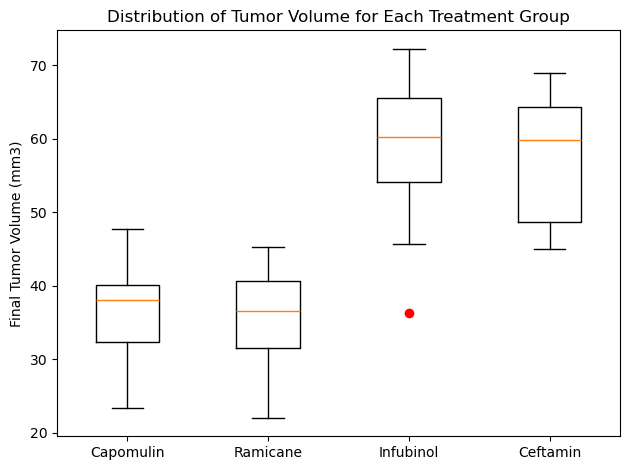

In [18]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.

plt.boxplot(tumor_volume_data, sym="r")
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
plt.ylabel('Final Tumor Volume (mm3)')
plt.title('Distribution of Tumor Volume for Each Treatment Group')
plt.tight_layout()
plt.show()

## Line and Scatter Plots

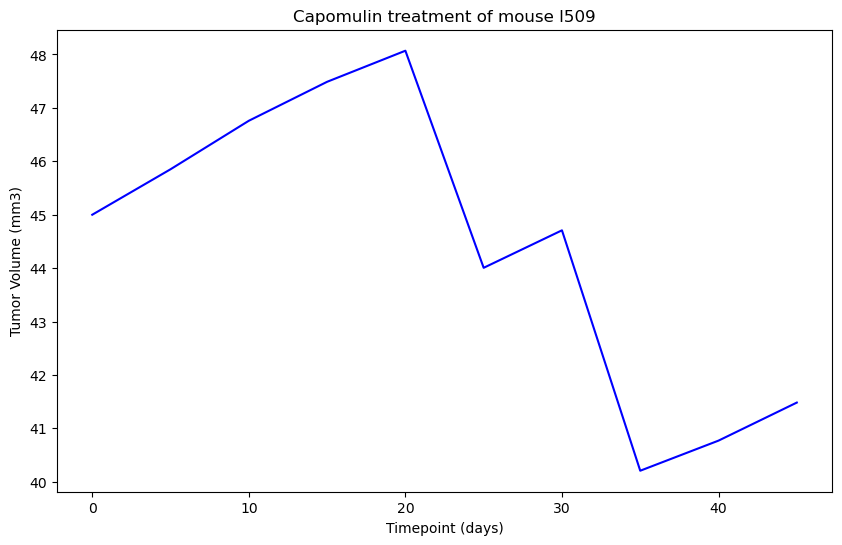

In [19]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
single_mouse_data = cleaned_p_c[(cleaned_p_c['Drug Regimen'] == 'Capomulin') & (cleaned_p_c['Mouse ID'] == 'l509')]

plt.figure(figsize=(10,6))
plt.plot(single_mouse_data['Timepoint'], single_mouse_data['Tumor Volume (mm3)'], color='b')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse l509')
#plt.legend()
#plt.grid(True)
plt.show()

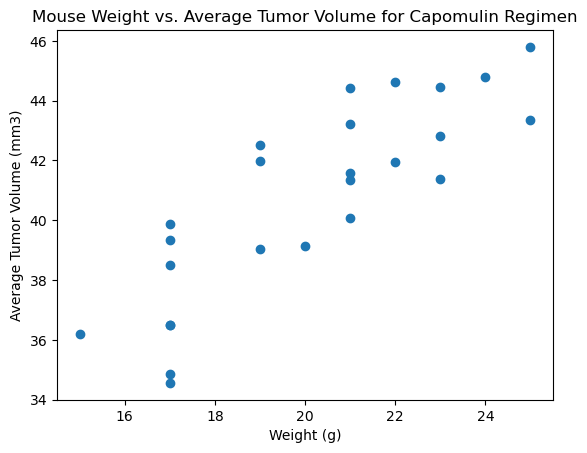

In [20]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
grp = cleaned_p_c[cleaned_p_c['Drug Regimen']=='Capomulin'].groupby('Mouse ID')
plt.scatter(grp['Weight (g)'].mean(),grp['Tumor Volume (mm3)'].mean())
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.show()


## Correlation and Regression

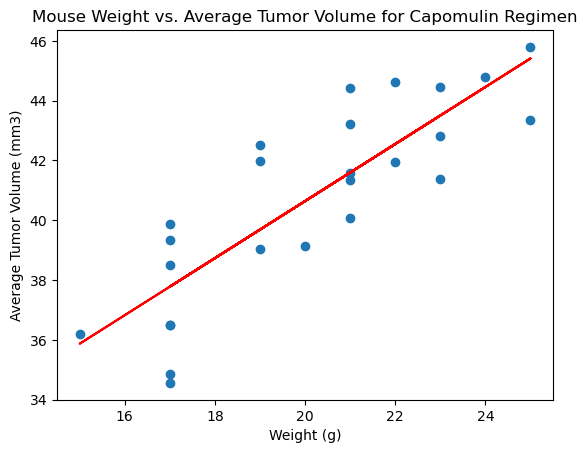

In [47]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

lrm = cleaned_p_c[cleaned_p_c['Drug Regimen']=='Capomulin'].groupby('Mouse ID')[['Tumor Volume (mm3)', 'Weight (g)']].mean()
x = lrm['Weight (g)']
y = lrm['Tumor Volume (mm3)']
lnr = st.linregress(x,y)


plt.plot(x, x * lnr.slope + lnr.intercept, 'r' )
plt.scatter(lrm['Weight (g)'],lrm['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.show()


In [50]:
#lrm = cleaned_p_c[cleaned_p_c['Drug Regimen']=='Capomulin'].groupby(['Weight (g)','Tumor Volume (mm3)'])
#lrm = cleaned_p_c.groupby(['Tumor Volume (mm3)', 'Weight (g)'])
#average_tumor_volume = lrm.iloc[:,4]
#mouse_weight = lrm.iloc[:,4]
#correlation = st.pearsonr(mouse_weight,average_tumor_volume)
#print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")



#lrm = grp.groupby['Tumor Volume (mm3)', 'Weight (g)']
#average_tumor_volume = lrm.iloc[:,0]
#mouse_weight = lrm.iloc[:,4]
#correlation = st.pearsonr(mouse_weight,average_tumor_volume)
#print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

#lrm = cleaned_p_c[cleaned_p_c['Drug Regimen']=='Capomulin'].groupby(['Weight (g)','Tumor Volume (mm3)'])
#lrm = cleaned_p_c.groupby(['Tumor Volume (mm3)', 'Weight (g)'])
#average_tumor_volume = lrm.iloc[:,4]
#mouse_weight = lrm.iloc[:,4]
#correlation = st.pearsonr(mouse_weight,average_tumor_volume)
#print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")


#lrm = cleaned_p_c[cleaned_p_c['Drug Regimen'] == 'Capomulin'].groupby('Mouse ID')

#plt.scatter(['Weight (g)'], ['Tumor Volume (mm3)'], label='Data Points')

#slope, intercept, r_value, p_value, std_err = linregress(['Weight (g)'], ['Tumor Volume (mm3)'])
#plt.plot(['Weight (g)'], slope * ['Weight (g)'] + intercept, color='red', label='Linear Regression')            

#plt.xlabel('Weight (g)')
#plt.ylabel('Average Tumor Volume (mm3)')
#plt.legend()
#plt.show()

#plt.scatter(grp['Weight (g)'].mean(),grp['Tumor Volume (mm3)'].mean())
#plt.plot(['Weight (g)', 'Tumor Volume (mm3)'])
#plt.xlabel('Weight (g)')
#plt.ylabel('Average Tumor Volume (mm3)')
#plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
#plt.show()